## Observations and Insights 

## Based on the  bar graphs I can conclude that the Capomulin appears to have the most total measurements 

## I can conclude box and whisker plot that there was only one outlier of the four drugs chosen. The outlier for Infubinol was 36.321346.

## Based on the scatter/line plot I can conclude that the scatter plot has a positive  correlation. The regression line slope is positive which means that as the weight increases so does the tumor volume.



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata,study_results, on ="Mouse ID", how ="outer")
# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mice = merged_df["Mouse ID"].value_counts()
total_mice = len(mice)
total_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

dup_mice = merged_df.loc[merged_df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
dup_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_df[merged_df['Mouse ID'].isin(dup_mice)== False]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
dup_mouse = clean_df["Mouse ID"].value_counts()
new_tot_mice = len(dup_mouse)
new_tot_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# sort data


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# grouby data by the "Drug Regimen"
drug_groupby = clean_df.groupby(['Drug Regimen'])

#sorted_df = drug_groupby.sorted_values(["Tumor Volume (mm3)"], ascending = True)
# pull mean of drug data for Tumor Volume only 
mean_data= drug_groupby["Tumor Volume (mm3)"].mean()
#mean_data
# pull median of drug data for Tumor volume only 
median_data = drug_groupby["Tumor Volume (mm3)"].median()
#median_data
# pull variance of drug data for Tumor Volume only 
var_data = drug_groupby["Tumor Volume (mm3)"].var()
#var_data

std_data = drug_groupby["Tumor Volume (mm3)"].std()
#std_data

sem_data = drug_groupby["Tumor Volume (mm3)"].sem()
#sem_data
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

stat_data_sum = pd.DataFrame({"Mean": mean_data, "Median": median_data, "Variance":var_data ,
                                "STD": std_data, "SEM":sem_data})
stat_data_sum



,Mean,Median,Variance,STD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
stat_data_sum2 = drug_groupby.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
stat_data_sum2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

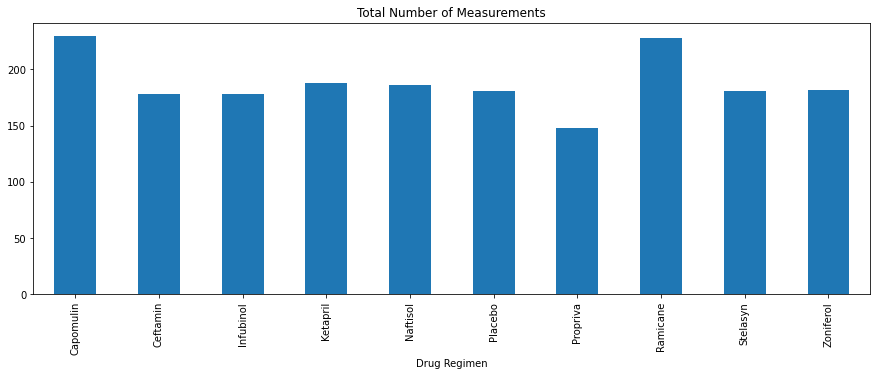

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

total_measure =drug_groupby.count()["Timepoint"]
total_measure

total_measure.plot(kind="bar", figsize =(15,5))
plt.title("Total Number of Measurements")
plt.show()

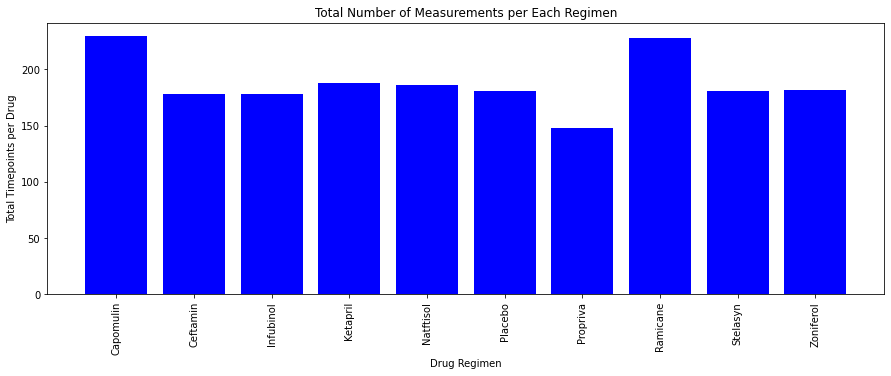

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
timepoint_data = drug_groupby["Mouse ID"].count().tolist()
timepoint_data

x_axis=np.arange(len(total_measure))
tick_locations = [value for value in x_axis]

plt.figure(figsize= (15,5))
plt.bar(x_axis,timepoint_data, color ='b')
plt.xticks(tick_locations,["Capomulin","Ceftamin","Infubinol","Ketapril","Natftisol","Placebo", "Propriva","Ramicane","Stelasyn","Zoniferol"] , rotation ="vertical")

plt.title("Total Number of Measurements per Each Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Timepoints per Drug")
plt.show()

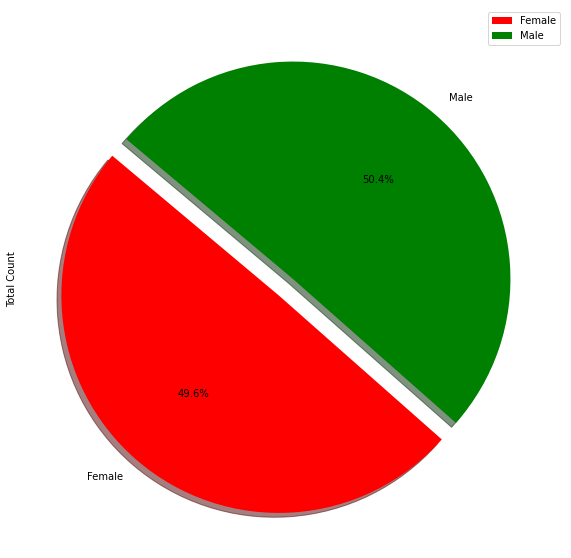

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Group Data by Mouse ID and Sex to get total values
gender= clean_df.groupby(["Mouse ID", "Sex"])
gender
gender_df=pd.DataFrame(gender.size())
gender_df

# make new DataFrame with only Mouse ID and Sex
gender_count= pd.DataFrame(gender_df.groupby(["Sex"]).count())
gender_count.columns = ["Total Count"]
gender_count["Percentage of Gender"] = (100*gender_count["Total Count"]/gender_count["Total Count"].sum())

gender_count


# Pie Plot using Pandas 
colors= ['red','green']
explode= (.1,0)

plot= gender_count.plot.pie(y='Total Count', figsize= (15,10),colors = colors, startangle=140, explode = explode, shadow = True, autopct="%1.1f%%")

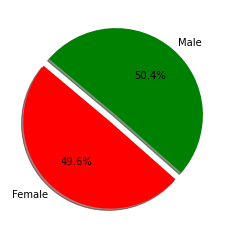

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_count


sizes= gender_count["Percentage of Gender"]
sex= ["Female","Male"]

explode= (.1,0)

plt.pie(sizes,explode=explode, labels=sex, colors=colors,autopct="%1.1f%%", shadow=True, startangle=140 );

## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drugs =["Capomulin","Ramicane","Infubinol","Ceftamin"]
# Start by getting the last (greatest) timepoint for each mouse
# final_vol= clean_df.drop_duplicates(subset=['Mouse ID'],keep='last')
# four_vol
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

final_vol= clean_df.sort_values(by=['Mouse ID','Timepoint']).drop_duplicates(subset=['Mouse ID'],keep='last')
final_drugs = final_vol[final_vol['Drug Regimen'].isin(drugs)== True]
four_drugs = final_drugs.sort_values(by=["Drug Regimen"])
four_drugs




,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
282,l897,Capomulin,Male,17,19,45,38.846876,1
337,j119,Capomulin,Female,7,23,45,38.125164,1
317,j246,Capomulin,Female,21,21,35,38.753265,1
104,u364,Capomulin,Male,18,17,45,31.023923,3
360,g316,Capomulin,Female,22,22,45,40.159220,2
...,...,...,...,...,...,...,...,...
94,j913,Ramicane,Female,4,17,45,31.560470,1
194,j989,Ramicane,Male,8,19,45,36.134852,1
9,k403,Ramicane,Male,21,16,45,22.050126,1
74,m546,Ramicane,Male,18,16,45,30.564625,1


In [20]:
# Put treatments into a list for for loop (and later for plot labels)
# treatments =["Capomulin","Ramicane","Infubinol","Ceftamin"]

# # Create empty list to fill with tumor vol data (for plotting)
# tumor_vol= []

# # Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
#     # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
#     # add subset 
    
    
#     # Determine outliers using upper and lower bounds
    



Capo = four_drugs[four_drugs['Drug Regimen'].isin(["Capomulin"])== True]['Tumor Volume (mm3)']
#quartiles = four_drugs['Tumor Volume (mm3)']
Rami = four_drugs[four_drugs['Drug Regimen'].isin(["Ramicane"])== True]['Tumor Volume (mm3)']
Infu = four_drugs[four_drugs['Drug Regimen'].isin(["Infubinol"])== True]['Tumor Volume (mm3)']
Ceft = four_drugs[four_drugs['Drug Regimen'].isin(["Ceftamin"])== True]['Tumor Volume (mm3)']

In [60]:
# Capomulin Quarttiles and IQR
Capo_quartiles = Capo.quantile([.25,.5,.75])
lowerq = Capo_quartiles[0.25]
upperq = Capo_quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"The lower quartile of Capomulin is: {lowerq}")
print(f"The upper quartile of Capolmulin is: {upperq}")
print(f"The interquartile range of Capomulin is: {iqr}")
print(f"The the median of Capomulin is: {Capo_quartiles[0.5]} ")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print(f" Capomulin outliers :{Capo.loc[(Capo<lower_bound)| (Capo> upper_bound)]}")

The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capolmulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The the median of Capomulin is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
 Capomulin outliers :Series([], Name: Tumor Volume (mm3), dtype: float64)


In [61]:
# Ramicane Quarttiles and IQR
Rami_quartiles = Rami.quantile([.25,.5,.75])
lowerq = Rami_quartiles[0.25]
upperq = Rami_quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"The lower quartile of Ramicane is: {lowerq}")
print(f"The upper quartile of Ramicane is: {upperq}")
print(f"The interquartile range of Ramicane is: {iqr}")
print(f"The the median of Ramicane is: {Rami_quartiles[0.5]} ")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print(f" Ramicane outliers :{Rami.loc[(Rami<lower_bound)| (Rami> upper_bound)]}")

The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
The the median of Ramicane is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
 Ramicane outliers :Series([], Name: Tumor Volume (mm3), dtype: float64)


In [62]:
# Infubinol Quartiles and IQR
Infu_quartiles = Infu.quantile([.25,.5,.75])
lowerq = Infu_quartiles[0.25]
upperq = Infu_quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"The lower quartile of Infubinol is: {lowerq}")
print(f"The upper quartile of Infubinol is: {upperq}")
print(f"The interquartile range of Infubinol is: {iqr}")
print(f"The the median of Infubinol is: {Infu_quartiles[0.5]} ")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print(f" Infubinol outliers :{Infu.loc[(Infu<lower_bound)| (Infu> upper_bound)]}")

The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
The the median of Infubinol is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
 Infubinol outliers :669    36.321346
Name: Tumor Volume (mm3), dtype: float64


In [63]:
# Ceftamin Quartiles and IQR
Ceft_quartiles = Ceft.quantile([.25,.5,.75])
lowerq = Ceft_quartiles[0.25]
upperq = Ceft_quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"The lower quartile of Ceftamin is: {lowerq}")
print(f"The upper quartile of Ceftamin is: {upperq}")
print(f"The interquartile range of Ceftamin is: {iqr}")
print(f"The the median of Ceftamin is: {Ceft_quartiles[0.5]} ")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print(f" Ceftamin outliers :{Ceft.loc[(Ceft<lower_bound)| (Ceft> upper_bound)]}")

The lower quartile of Ceftamin is: 48.72207785
The upper quartile of Ceftamin is: 64.29983003
The interquartile range of Ceftamin is: 15.577752179999997
The the median of Ceftamin is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.
 Ceftamin outliers :Series([], Name: Tumor Volume (mm3), dtype: float64)


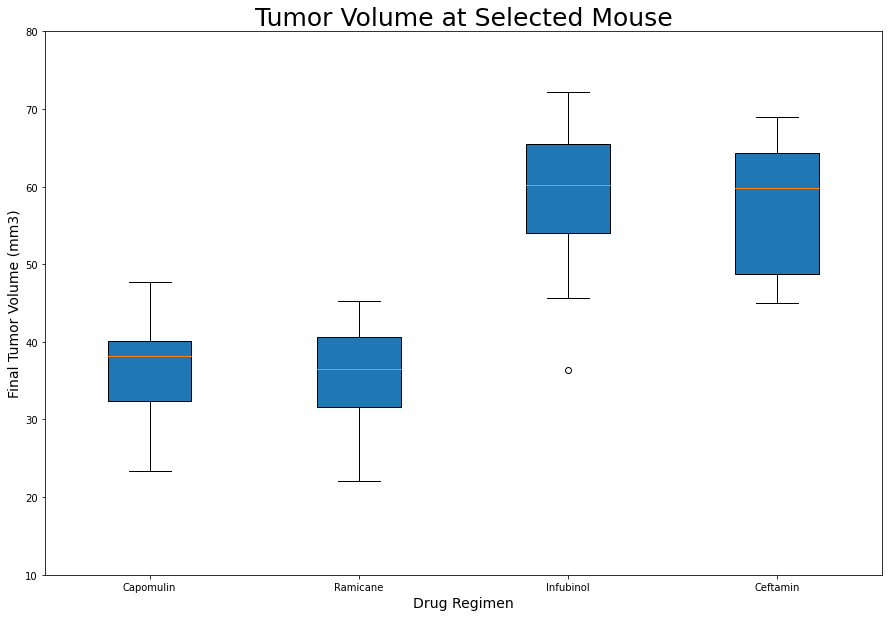

In [25]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
Capo = four_drugs[four_drugs['Drug Regimen'].isin(["Capomulin"])== True]['Tumor Volume (mm3)']
#quartiles = four_drugs['Tumor Volume (mm3)']
Rami = four_drugs[four_drugs['Drug Regimen'].isin(["Ramicane"])== True]['Tumor Volume (mm3)']
Infu = four_drugs[four_drugs['Drug Regimen'].isin(["Infubinol"])== True]['Tumor Volume (mm3)']
Ceft = four_drugs[four_drugs['Drug Regimen'].isin(["Ceftamin"])== True]['Tumor Volume (mm3)']
data_plot = [Capo, Rami, Infu, Ceft]


Regimen= ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']


fig1, ax1 = plt.subplots(figsize=(15, 10))
ax1.set_title('Tumor Volume at Selected Mouse',fontsize =25)
ax1.set_ylabel('Final Tumor Volume (mm3)',fontsize = 14)
ax1.set_xlabel('Drug Regimen',fontsize = 14)
ax1.boxplot(data_plot, labels=Regimen, widths = 0.4, patch_artist=True,vert=True)

plt.ylim(10, 80)

# plt.savefig("../Images/box_plot.png", bbox_inches = "tight")

plt.show()

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

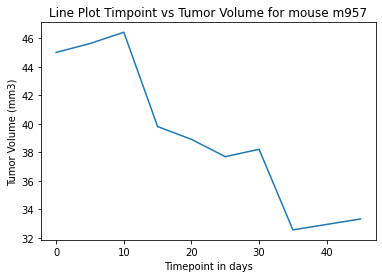

In [54]:
# Generate a line plot of  time point vs tumor volume  for a mouse treated with Capomulin

capomulin_df= clean_df.loc[clean_df["Drug Regimen"]=="Capomulin"]
capomulin_df
line_df= capomulin_df.loc[capomulin_df["Mouse ID"]=="m957"]
line_df

x_axis= line_df["Timepoint"]
y_axis= line_df["Tumor Volume (mm3)"]

plt.plot(x_axis,y_axis)
plt.xlabel('Timepoint in days')
plt.ylabel('Tumor Volume (mm3)')
plt.title("Line Plot Timpoint vs Tumor Volume for mouse m957")
plt.show()

Text(0.5, 0, 'Wieght (g) per Mouse')

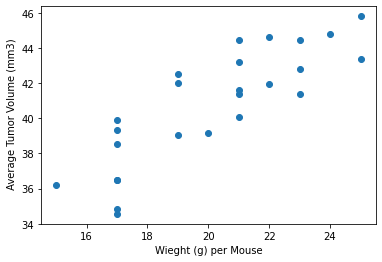

In [49]:
# Generate a scatter plot of  mouse weight vs. average tumor volume for the Capomulin regimen
cap_groupby = capomulin_df.groupby(["Mouse ID"]).mean()["Tumor Volume (mm3)"]
cap_groupby

mouse_weight = pd.merge(cap_groupby,mouse_metadata, on="Mouse ID")
mouse_weight

x_value= mouse_weight["Weight (g)"]
y_value= mouse_weight["Tumor Volume (mm3)"]


plt.scatter(x_value,y_value)
plt.ylabel(" Average Tumor Volume (mm3)")
plt.xlabel("Wieght (g) per Mouse")


## Correlation and Regression

In [50]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation_value = st.pearsonr(x_value,y_value)
correlation_value



(0.8419363424694717, 1.322572243471279e-07)

Correlation value is 84.19
The r-squared is: 0.71


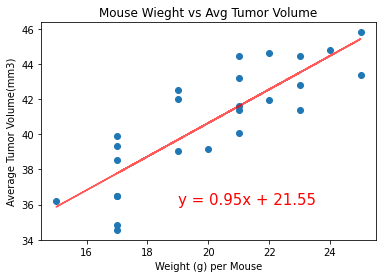

In [57]:
# Linear Regression  mouse weight vs. average tumor volume

slope,intercept,rvalue,pvalue,stderr= st.linregress(x_value,y_value)
regression_values= x_value*slope + intercept 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print( f'Correlation value is {round(rvalue*100,2)}')
print(f"The r-squared is: {round(rvalue**2,2)}")

plt.scatter(x_value,y_value)
plt.plot(x_value,regression_values,"r-",alpha=0.65)

plt.annotate(line_eq,(19,36),fontsize=15,color="red")
plt.ylabel("Average Tumor Volume(mm3)")
plt.xlabel("Weight (g) per Mouse")
plt.title("Mouse Wieght vs Avg Tumor Volume");